In [1]:
import pandas as pd;
#Load dataset and examine dataset, rename columns to questions and answers
df=pd.read_csv("Book1.csv", encoding= 'unicode_escape');
df.columns=["questions","answers"];
df

,questions,answers
0,"In three or less sentences, explain the Holocaust","During the Second World War, the Nazis murdere..."
1,Explain what Corona 19 is and what the abbrevi...,"The coronavirus, is inciting panic for a numbe..."
2,Explain some of the symptoms of Corona 19,"fever, dry cough, tiredness, headache, sore th..."
3,"In football, what nickname does Jose Mourinho ...",special one
4,What was significant about Mario Balotelli's o...,won premier league
5,"In Biology, what is the Nucleus and what does ...",A nucleus is a membrane-bound that contains th...
6,What is the role of disgestive system?,Digestion is the breakdown of food into small ...
7,What is a palindrome?,"a word, phrase, or sequence that reads the sam..."
8,"What does the saying ""Don't cry wolf"" imply?",The phrase 'Cry Wolf' is used to indicate that...


## Preprocessing & helper functions

In [2]:
import re
import gensim 
from gensim.parsing.preprocessing import remove_stopwords
#Gensim is an open-source library for unsupervised topic modeling and natural language processing

#removing stopwords
def clean_sentence(sentence, stopwords=False):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)    
    if stopwords:
         sentence = remove_stopwords(sentence)
    
    return sentence

#getting the cleaned sentences from dataframe
def get_cleaned_sentences(df,stopwords=False):    
    sents=df[["questions"]];
    cleaned_sentences=[]

    for index,row in df.iterrows():
        #print(index,row)
        cleaned=clean_sentence(row["questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

#printing cleaned sentences with removal of stopwords
cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
print(cleaned_sentences);

print("\n")

#printing cleaned sentences without removal of stopwords
cleaned_sentences_with_stopwords=get_cleaned_sentences(df,stopwords=False)
print(cleaned_sentences_with_stopwords);
    

['sentences explain holocaust', 'explain corona 19 abbreviation stands', 'explain symptoms corona 19', 'football nickname jose mourinho refer', 'significant mario balotellis assist premier league manchester city', 'biology nucleus', 'role disgestive', 'palindrome', 'saying dont wolf imply']


['in three or less sentences explain the holocaust', 'explain what corona 19 is and what the abbreviation stands for', 'explain some of the symptoms of corona 19', 'in football what nickname does jose mourinho refer to himself as and why', 'what was significant about mario balotellis only assist in the premier league for manchester city', 'in biology what is the nucleus and what does it do', 'what is the role of disgestive system', 'what is a palindrome', 'what does the saying dont cry wolf imply']


In [3]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity;
import matplotlib.pyplot as plt
list_x = []
list_y = []

#displaying, calculating and plotting the similarity of each question in dataframe with the asked question
#passing question embedding, sentence embedding (bow, w2v or glove), dataframe and cleaned sentences
def retrieveAndPrintFAQAnswer(question_embedding,sentence_embeddings,FAQdf,sentences):
    max_sim=-1;
    index_sim=-1;
    print('-----------------------------------------------------------------------------------------------------------------')
    for index,faq_embedding in enumerate(sentence_embeddings):
        #comparing the question in dataframe and asked question and finding its similarity
        sim=cosine_similarity(faq_embedding,question_embedding)[0][0];
        print(index, '\t |', sim, '\t |', sentences[index])
        #appending to list, for further plotting
        list_x.append(index)
        list_y.append(sim)
        if sim>max_sim:
            max_sim=sim;
            index_sim=index;
    
    print('-----------------------------------------------------------------------------------------------------------------')
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(list_x, list_y, width = 0.4) #plotting lists
    plt.xticks(list_x)
    plt.xlabel("Index")
    plt.ylabel("Similarity Score")
    plt.title("Similarity score to determine the accurate question from the dataset")
    plt.show()
    print("\n")
    return(FAQdf.iloc[index_sim,1])

In [4]:
#Bow

In [5]:
import numpy

#using cleaned sentences with stopwords here
sentences=cleaned_sentences_with_stopwords

# Split it by white space 
sentence_words = [[word for word in document.split() ]
         for document in sentences]

from gensim import corpora
#corpora is a lightweight, fast and scalable corpus library able to store a collection of raw text documents with additional key-value headers
dictionary = corpora.Dictionary(sentence_words)
for key, value in dictionary.items():
    print(key, ' : ', value)

#calculating sentence embedding for bow embedding
bow_corpus = [dictionary.doc2bow(text) for text in sentence_words]
for sent,embedding in zip(sentences,bow_corpus):
    print(sent)
    print(embedding)

#now calculating the question embedding
question_orig="In Biology, what is the Nucleus and what does it do?"
question=clean_sentence(question_orig,stopwords=False);
question_embedding = dictionary.doc2bow(question.split())


print("\n\n",question,"\n",question_embedding)

0  :  explain
1  :  holocaust
2  :  in
3  :  less
4  :  or
5  :  sentences
6  :  the
7  :  three
8  :  19
9  :  abbreviation
10  :  and
11  :  corona
12  :  for
13  :  is
14  :  stands
15  :  what
16  :  of
17  :  some
18  :  symptoms
19  :  as
20  :  does
21  :  football
22  :  himself
23  :  jose
24  :  mourinho
25  :  nickname
26  :  refer
27  :  to
28  :  why
29  :  about
30  :  assist
31  :  balotellis
32  :  city
33  :  league
34  :  manchester
35  :  mario
36  :  only
37  :  premier
38  :  significant
39  :  was
40  :  biology
41  :  do
42  :  it
43  :  nucleus
44  :  disgestive
45  :  role
46  :  system
47  :  a
48  :  palindrome
49  :  cry
50  :  dont
51  :  imply
52  :  saying
53  :  wolf
in three or less sentences explain the holocaust
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
explain what corona 19 is and what the abbreviation stands for
[(0, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2)]
explain some of the symptoms

In [6]:
'''To find phrase embeddings, there are sevaral specialized techniques. 
The most simple technique to convert word embeddings to phrase embeddings, 
that is applicable with word2vec and glove embeddings, 
is to sum up the individual word embeddings in the phrase to get a phrase vector.'''
#loading w2v and glove models
from gensim.models import Word2Vec 
import gensim.downloader as api
glove_model=None;
try:
    glove_model = gensim.models.KeyedVectors.load("./glovemodel.mod")
    print("Loaded glove model")
except:            
    glove_model = api.load('glove-twitter-25')
    glove_model.save("./glovemodel.mod")
    print("Saved glove model")

v2w_model=None;
try:
    v2w_model = gensim.models.KeyedVectors.load("./w2vecmodel.mod")
    print("Loaded w2v model")
except:            
    v2w_model = api.load('word2vec-google-news-300')
    v2w_model.save("./w2vecmodel.mod")
    print("Saved glove model")
    

def getWordVec(word,model):
        samp=model['model'];
        vec=[0]*len(samp);
        try:
                vec=model[word];
        except:
                vec=[0]*len(samp);
        return (vec)

#phrase= 1 iteration of cleaned_sentence, and embedding model: w2v or glove
def getPhraseEmbedding(phrase,embeddingmodel):
        samp=getWordVec('model', embeddingmodel);
        vec=numpy.array([0]*len(samp));
        den=0;
        for word in phrase.split():
            den=den+1;
            vec=vec+numpy.array(getWordVec(word,embeddingmodel));
        
        return vec.reshape(1, -1)


Loaded glove model
Loaded w2v model


Bag of Words
-----------------------------------------------------------------------------------------------------------------
0 	 | 0.4472135954999579 	 | sentences explain holocaust
1 	 | 0.4472135954999579 	 | explain corona 19 abbreviation stands
2 	 | 0.4472135954999579 	 | explain symptoms corona 19
3 	 | 0.9999999999999999 	 | football nickname jose mourinho refer
4 	 | 0.9999999999999999 	 | significant mario balotellis assist premier league manchester city
5 	 | 0.9999999999999999 	 | biology nucleus
6 	 | 0.9557790087219501 	 | role disgestive
7 	 | 0.9260923597695476 	 | palindrome
8 	 | 0.9557790087219501 	 | saying dont wolf imply
-----------------------------------------------------------------------------------------------------------------


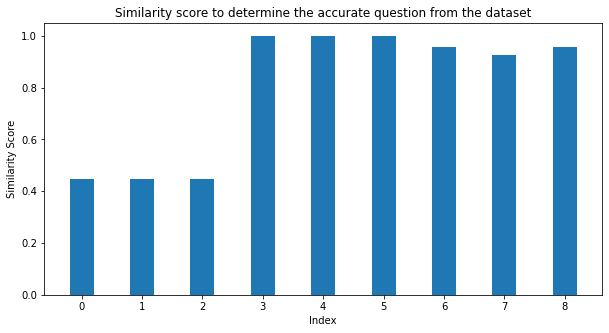



Word2Vec
-----------------------------------------------------------------------------------------------------------------
0 	 | 0.3059931811185642 	 | sentences explain holocaust
1 	 | 0.33119372821440024 	 | explain corona 19 abbreviation stands
2 	 | 0.3117537334300953 	 | explain symptoms corona 19
3 	 | 0.3015489151758052 	 | football nickname jose mourinho refer
4 	 | 0.3107026086043167 	 | significant mario balotellis assist premier league manchester city
5 	 | 0.5817009193428533 	 | biology nucleus
6 	 | 0.2505094518721857 	 | role disgestive
7 	 | 0.1596321924116121 	 | palindrome
8 	 | 0.4124677647813219 	 | saying dont wolf imply
-----------------------------------------------------------------------------------------------------------------


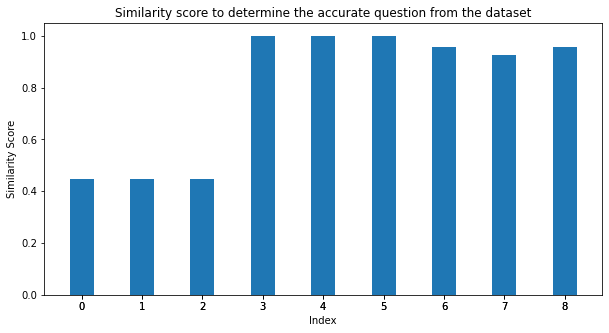



Glove
-----------------------------------------------------------------------------------------------------------------
0 	 | 0.7592916691260233 	 | sentences explain holocaust
1 	 | 0.9017360106910228 	 | explain corona 19 abbreviation stands
2 	 | 0.8401360189016713 	 | explain symptoms corona 19
3 	 | 0.7918485156448583 	 | football nickname jose mourinho refer
4 	 | 0.6870498618913662 	 | significant mario balotellis assist premier league manchester city
5 	 | 0.5514011580583604 	 | biology nucleus
6 	 | 0.7575852172860941 	 | role disgestive
7 	 | -0.04805494539456791 	 | palindrome
8 	 | 0.9097446876003835 	 | saying dont wolf imply
-----------------------------------------------------------------------------------------------------------------


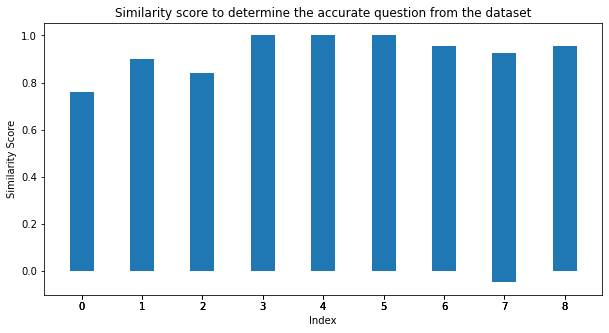

In [7]:
#With bow
print("Bag of Words")
retrieveAndPrintFAQAnswer(question_embedding,bow_corpus,df,cleaned_sentences);

#With w2Vec
print("Word2Vec")
sent_embeddings=[];
#calculating sentence embedding for w2v embedding
for sent in cleaned_sentences:
    sent_embeddings.append(getPhraseEmbedding(sent,v2w_model));

question_embedding=getPhraseEmbedding(question,v2w_model);

retrieveAndPrintFAQAnswer(question_embedding,sent_embeddings,df, cleaned_sentences);

#With Glove
print("Glove")
sent_embeddings=[];
#calculating sentence embedding for glove embedding
for sent in cleaned_sentences:
    sent_embeddings.append(getPhraseEmbedding(sent,glove_model));
    
question_embedding=getPhraseEmbedding(question,glove_model);

retrieveAndPrintFAQAnswer(question_embedding,sent_embeddings,df, cleaned_sentences);


In [8]:
#using w2v again, because we are using w2v in final model
sent_embeddings=[];
for sent in cleaned_sentences:
    sent_embeddings.append(getPhraseEmbedding(sent,v2w_model));

question_embedding=getPhraseEmbedding(question,v2w_model);

-----------------------------------------------------------------------------------------------------------------
0 	 | 0.3059931811185642 	 | sentences explain holocaust
1 	 | 0.33119372821440024 	 | explain corona 19 abbreviation stands
2 	 | 0.3117537334300953 	 | explain symptoms corona 19
3 	 | 0.3015489151758052 	 | football nickname jose mourinho refer
4 	 | 0.3107026086043167 	 | significant mario balotellis assist premier league manchester city
5 	 | 0.5817009193428533 	 | biology nucleus
6 	 | 0.2505094518721857 	 | role disgestive
7 	 | 0.1596321924116121 	 | palindrome
8 	 | 0.4124677647813219 	 | saying dont wolf imply
-----------------------------------------------------------------------------------------------------------------


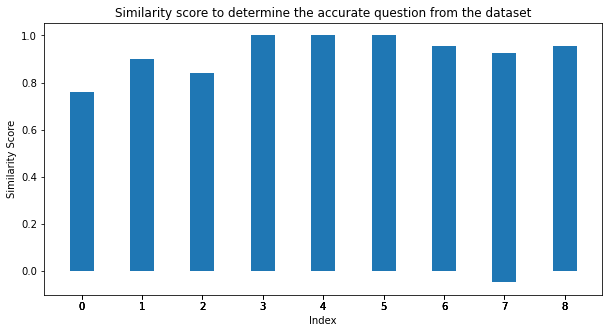

In [9]:
#retrieving the answer of highest scored similar question...
x = retrieveAndPrintFAQAnswer(question_embedding,sent_embeddings,df, cleaned_sentences);

In [10]:
print(x)

A nucleus is a membrane-bound that contains the cell's chromosomes. Pores in the nuclear membrane allow for the passage of molecules in and out of the nucleus.


In [35]:
#getting user answer
temp = str(input("Enter your answer?"))

Enter your answer?killing of jews by nazis


In [36]:
temp

'killing of jews by nazis'

In [37]:
import re
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
def preprocess(raw_text):
    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    # convert to lower case and split 
    words = letters_only_text.lower().split()
    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))
    return cleaned_words

def cosine_distance_between_two_words(word1, word2,model):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2,model):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2,model) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2,model):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')
    return round((1-cosine)*100,2)

def heat_map_matrix_between_two_sentences(s1,s2,model):
    df = calculate_heat_matrix_for_two_sentences(s1,s2,model)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    temp = cosine_distance_wordembedding_method(s1, s2,model)
    return ax_blue, temp

In [38]:
def cosine_distance_countvectorizer_method(s1, s2):
    # sentences to list
    allsentences = [s1 , s2]
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return round((1-cosine)*100,2)
    #return cosine

In [39]:
#similarity using countvectorizer
similarity_CV = cosine_distance_countvectorizer_method(temp , x)

Similarity of two sentences are equal to  17.89 %


Word Embedding method with a cosine distance asses that our two sentences are similar to 75.55 %


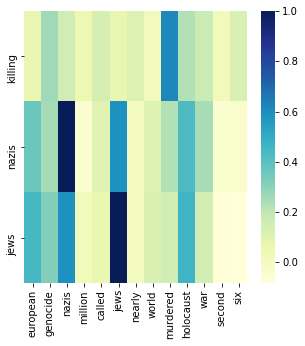

In [40]:
#similarity using word2vec
similarity_w2v = heat_map_matrix_between_two_sentences(temp,x, v2w_model)

Word Embedding method with a cosine distance asses that our two sentences are similar to 87.13 %


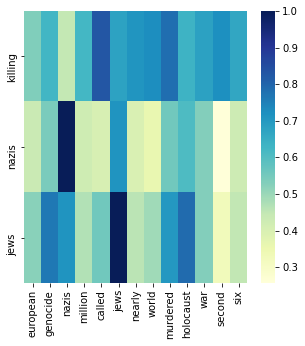

In [41]:
#similarity using glove
similarity_glove = heat_map_matrix_between_two_sentences(temp,x, glove_model)

In [18]:
print(similarity_CV, similarity_w2v[1], similarity_glove[1])
similarity_score = [similarity_CV, similarity_w2v[1], similarity_glove[1]]
index = ['CountVectorizer', 'Word2Vec','Glove']
list_100 = [0,10,20,30,40,50,60,70,80,90,100]

50.0 51.31 89.96


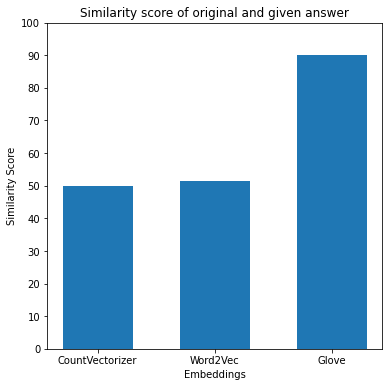

In [19]:
fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(index, similarity_score, width = 0.6)
plt.xticks(index)
plt.yticks(list_100)
plt.xlabel("Embeddings")
plt.ylabel("Similarity Score")
plt.title("Similarity score of original and given answer")
plt.show()

In [20]:
#now counting the word count of questions and answers

In [21]:
df['word_count_question'] = df['questions'].apply(lambda x: len(str(x).split(" ")))
df['word_count_answer'] = df['answers'].apply(lambda x: len(str(x).split(" ")))

In [22]:
#calculating the quartiles, min, max, std etc for column question
df.word_count_question.describe()

count     9.000000
mean      9.222222
std       3.382964
min       4.000000
25%       7.000000
50%       8.000000
75%      11.000000
max      15.000000
Name: word_count_question, dtype: float64

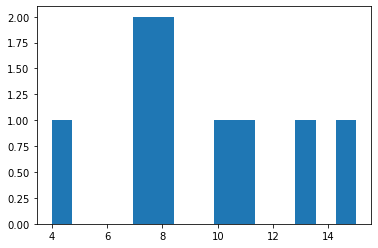

In [23]:
x = df['word_count_question']
n_bins = 15
#plot histogram for questions
plt.hist(x, bins=n_bins)
plt.show()

In [24]:
#calculating the quartiles, min, max, std etc for column question
df.word_count_answer.describe()

count     9.000000
mean     20.222222
std      14.385564
min       2.000000
25%      12.000000
50%      18.000000
75%      25.000000
max      44.000000
Name: word_count_answer, dtype: float64

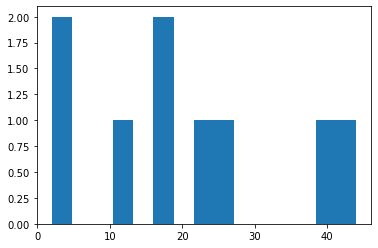

In [25]:
x = df['word_count_answer']
n_bins = 15
#plot histogram for answers
plt.hist(x, bins=n_bins)
plt.show()

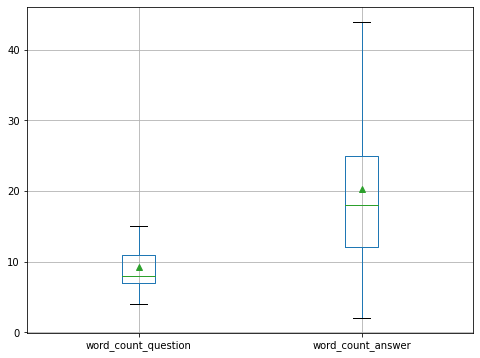

In [26]:
# plot the dataframe as needed
ax = df.plot.box(figsize=(8, 6), showmeans=True)
ax.grid()